**Project 1 Check In**
Our team has chosen to use the **Student Performance Factors Dataset**

**Features**
The main features our team will be focused on are:


*   Hours Studied
*   Attendance
*   Parental Involvement
*   Access to Resources
*   Previous Scores
*   Learning Disability
*   Distance from Home
*   Tutoring Sessions

Explanation:
The Response Variable we are using will be **Exam_Score**
Therefore we're looking for what features we'd expect to have a greatest impact on exam score. The general list of features was deduced using domain knowledge, as we're all students who have some domain expertise in exam performance.

From this list we looked at some correlations between these features and our main response variable. Some of these plots can be shown below. Using the combination of our initial feature list and the resulting modeling, we concluded on focusing on the above features.


Hour_Studied: Quantifies work put in to prepare for the exam

Attendance: Quantifies participation in class to learn material

Previous_Scores: Displayed past performance by same student

Learning_Disabilities: Binary classification that impacts learning

Parental_Involvement & Tutoring_Sessions: Describe outside assistance

Distance_from_Home:  Impact time available to study and relationship with school

Access_to_Resources: Impacts ability and quality of studying



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

complete_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

print(complete_data.columns)

complete_data.head(10)


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [115]:
# Data Cleaning attempts (Missingness and Imputation)

# Clean the CSV to only use the features we plan to analyze, as well as the response variable

main_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Parental_Involvement', 'Learning_Disabilities', 'Access_to_Resources', 'Distance_from_Home', 'Tutoring_Sessions', 'Exam_Score']

data = complete_data[main_features]

# Searched data for missing values and confirmed all cells were complete
print("columns and how many null values")
print(data.isnull().sum())

# Check for any negative values
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

# Check for negative values in each numeric column
print("numeric columns", numeric_cols.columns)
negative_counts = (numeric_cols < 0).sum()

# Display columns with negative values
print("Count of Negative Values in Each Numeric Column:")
print(len(negative_counts[negative_counts > 0]))  # Only show columns with negative values


columns and how many null values
Hours_Studied             0
Attendance                0
Previous_Scores           0
Parental_Involvement      0
Learning_Disabilities     0
Access_to_Resources       0
Distance_from_Home       67
Tutoring_Sessions         0
Exam_Score                0
dtype: int64
numeric columns Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Exam_Score'],
      dtype='object')
Count of Negative Values in Each Numeric Column:
0


In [114]:
# From the above we can see that Distance From Home has some invalid cells
null_distance_rows = data[data['Distance_from_Home'].isnull()]

# We can confirm that some rows are coming up with NAN

# Get all unique values in 'Distance_from_Home' column
unique_values = data['Distance_from_Home'].unique()

# Print the unique values
print(unique_values)

# Clean the dataset by removing these rows
# row removal makes the most sense since no alternative value makes sense in the context of distance from home
# Additionally, the number of rows removed (67) is insignificant as it is ~1% of our rows

data = data.dropna(subset=['Distance_from_Home'])

# Test again to confirm no NAN rows are left

print(data.isnull().sum())

['Near' 'Moderate' 'Far']
Hours_Studied            0
Attendance               0
Previous_Scores          0
Parental_Involvement     0
Learning_Disabilities    0
Access_to_Resources      0
Distance_from_Home       0
Tutoring_Sessions        0
Exam_Score               0
dtype: int64


**Exploratory Data Analysis**

Main Goal: Determine predictors that are likely to impact Exam Scores (response variable) for our linear regresion model

For each of the features in our dataset, we observed scatter plots and boxplots (depending on numeric / classification) to determine which features had the greatest impact on exam score. We were able to conclude that:

Hours_Studied, Attendance, Parental_Involvement, Access_To_Resources, and Learning_Disabilities had High to Medium impact on exam score from initial exploratory analysis.

Furhermore: Distance_From_Home, Previous_Score, and Tutoring_Sessions all had a moderate impact on exam score.

All other features showed little to no impact based on intial screening

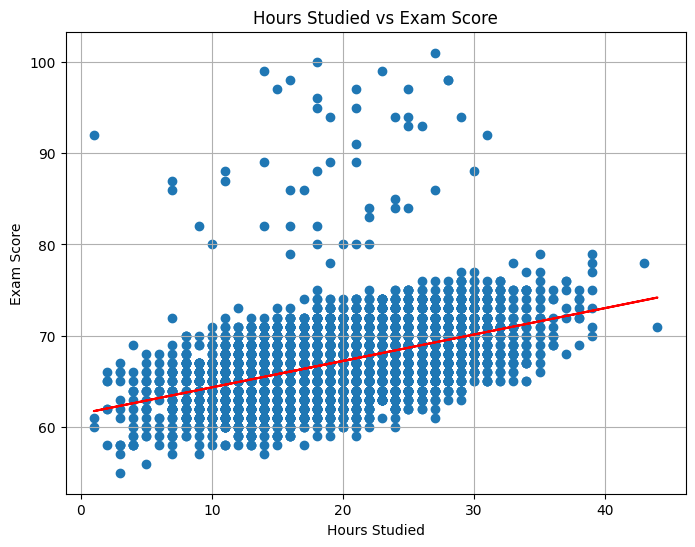

In [ ]:
# Exploratory Data Analysis
# Example of high correlation
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours_Studied'], data['Exam_Score'])
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

m, b = np.polyfit(data['Hours_Studied'], data['Exam_Score'], 1)

# Plotting the line of best fit
plt.plot(data['Hours_Studied'], m*data['Hours_Studied'] + b, color='red', label='Best fit line')
plt.grid(True)
plt.show()


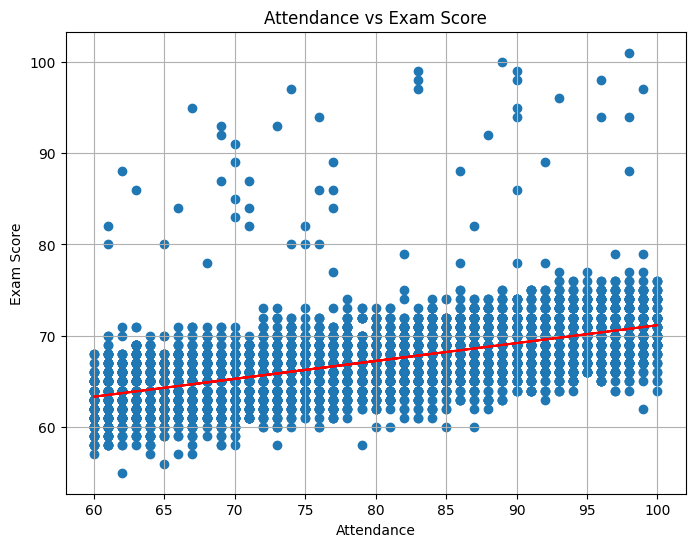

In [59]:
# Exploratory Data Analysis
# Example of Medium correlation
plt.figure(figsize=(8, 6))
plt.scatter(data['Attendance'], data['Exam_Score'])
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')

m, b = np.polyfit(data['Attendance'], data['Exam_Score'], 1)

# Plotting the line of best fit
plt.plot(data['Attendance'], m*data['Attendance'] + b, color='red', label='Best fit line')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

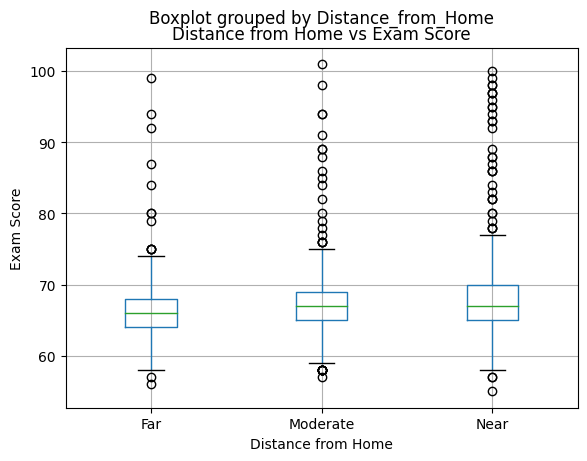

In [112]:
# Exploratory Data Analysis
# Example of Moderate correlation with exam score
plt.figure(figsize=(8, 6))
data.boxplot(column='Exam_Score', by='Distance_from_Home', grid=True)
plt.title('Distance from Home vs Exam Score')
plt.xlabel('Distance from Home')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

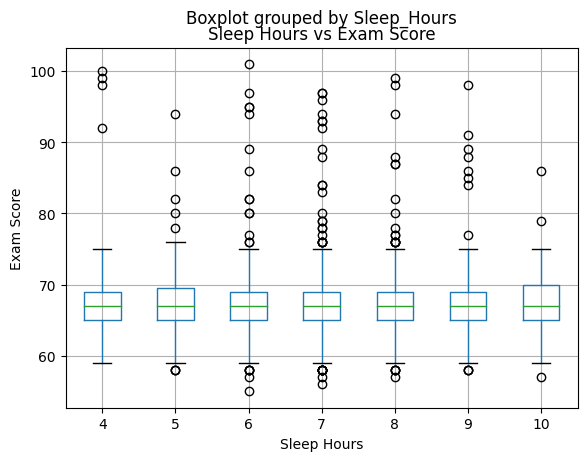

In [100]:
# Exploratory Data Analysis
# Example of No Correlation
plt.figure(figsize=(8, 6))
complete_data.boxplot(column='Exam_Score', by='Sleep_Hours', grid=True)
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


The above box plot shows very little correlation, if any, between Sleep Hours and Exam Scores. Thus, we decided to eliminate Sleep Hours from the dataset.

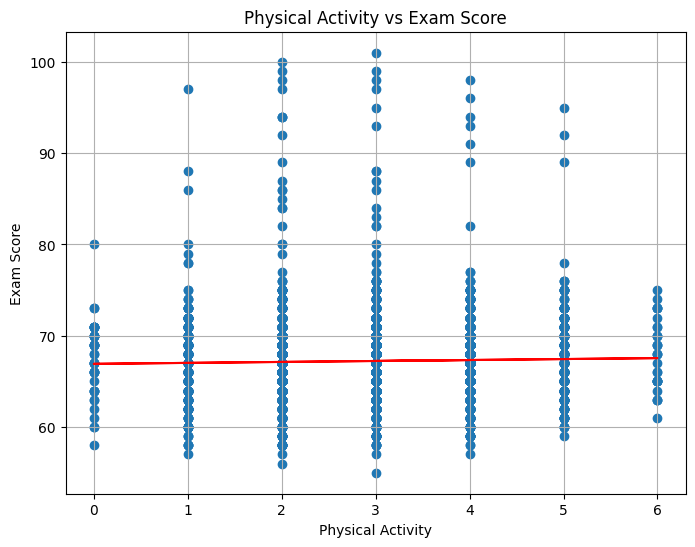

In [101]:
# Exploratory Data Analysis
# Example of Low to No corelation
feature_data = complete_data['Physical_Activity']
plt.figure(figsize=(8, 6))
plt.scatter(feature_data, data['Exam_Score'])
plt.title('Physical Activity vs Exam Score')
plt.xlabel('Physical Activity')
plt.ylabel('Exam Score')

m, b = np.polyfit(feature_data, data['Exam_Score'], 1)

# Plotting the line of best fit
plt.plot(feature_data, m*feature_data + b, color='red', label='Best fit line')
plt.grid(True)
plt.show()